---
title: "Homework 2"
format:
    html:
        embed-resources: true
---

__Due Date:__ 2025-10-15 at 8:30 AM PT
---


__Name:__ \<Benjamin Salvo\>

For this assignment, you will practice downloadings, cleaning, and analyzing data from the [National Risk Index (NRI)](https://hazards.fema.gov/nri/) and the [CDC Social Vulnerability Index (SVI)](https://www.atsdr.cdc.gov/placeandhealth/svi/index.html).

## Preparation

1. Create a 'data' folder in the root directory of your repository.
1. Inside the 'data' folder, create a 'raw' folder.
1. Add and commit a '.gitignore' file to the root directory of this repository that excludes all contents of the 'data' folder.
1. Download the county-level NRI and SVI data for the entire United States. Place the data in the 'data/raw' folder.
    - NRI data: Download the "All Counties - County-level detail (Table)" CSV file from [here](https://hazards.fema.gov/nri/data-resources#csvDownload).
    - SVI data: Download the 2022 county-level dataset (CSV format) from [here](https://www.atsdr.cdc.gov/place-health/php/svi/svi-data-documentation-download.html).
1. In the repository README, provide a brief (1-2 sentence) description of each file in the 'data' folder and a link to the original source of the data.

## Task 1 - NRI Data Cleaning

__1. Import the NRI data. Ensure that the [FIPS code](https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code) variable ('STCOFIPS') is correctly identified as a string / character variable. Otherwise, the leading zeros will be removed.__

In [1]:
# First we are using the default functions on Python

import csv

file_path1 = '../data/raw/NRI_Table_Counties.csv'    

In [2]:
# Using pandas
import pandas as pd

#Creating nri_data for the original data table

nri_data = pd.read_csv(file_path1, dtype={"STCOFIPS": str})

print(nri_data.head())  

   OID_  NRI_ID    STATE STATEABBRV  STATEFIPS   COUNTY COUNTYTYPE  \
0     1  C01001  Alabama         AL          1  Autauga     County   
1     2  C01003  Alabama         AL          1  Baldwin     County   
2     3  C01005  Alabama         AL          1  Barbour     County   
3     4  C01007  Alabama         AL          1     Bibb     County   
4     5  C01009  Alabama         AL          1   Blount     County   

   COUNTYFIPS STCOFIPS  POPULATION  ...  WNTW_EALS            WNTW_EALR  \
0           1    01001       58764  ...  15.784587             Very Low   
1           3    01003      231365  ...  56.205509  Relatively Moderate   
2           5    01005       25160  ...  18.632002       Relatively Low   
3           7    01007       22239  ...  13.308573             Very Low   
4           9    01009       58992  ...  23.645930       Relatively Low   

      WNTW_ALRB     WNTW_ALRP     WNTW_ALRA WNTW_ALR_NPCTL    WNTW_RISKV  \
0  2.687716e-07  7.410082e-09  8.725777e-06      10.

__2. Subset the NRI data to include only the 5-digit state/county FIPS code and all colums ending with '\_AFREQ' and '\_RISKR'. Each of these columns represents a different hazard type.__

In [3]:
# Selecting columns ending with AFREQ
columns_ending_AFREQ = [col for col in nri_data.columns if col.endswith("_AFREQ")]

# Selecting columns ending with RISK
columns_ending_RISKR = [col for col in nri_data.columns if col.endswith("_RISKR")]  

#Creating the new set of columns    
FIPSCode = ["STCOFIPS"]     
new_columns = FIPSCode + columns_ending_AFREQ + columns_ending_RISKR 
    
#Creating the new subset    

subset_nri_data = nri_data[new_columns] 
subset_nri_data.head()

,STCOFIPS,AVLN_AFREQ,CFLD_AFREQ,CWAV_AFREQ,DRGT_AFREQ,ERQK_AFREQ,HAIL_AFREQ,HWAV_AFREQ,HRCN_AFREQ,ISTM_AFREQ,...,ISTM_RISKR,LNDS_RISKR,LTNG_RISKR,RFLD_RISKR,SWND_RISKR,TRND_RISKR,TSUN_RISKR,VLCN_RISKR,WFIR_RISKR,WNTW_RISKR
0,01001,NaN,NaN,0.0,25.969774,0.000431,2.806764,0.371517,0.080450,0.402025,...,Very Low,Relatively Low,Relatively Low,Relatively Low,Relatively Low,Relatively Moderate,Not Applicable,Not Applicable,Very Low,Very Low
1,01003,NaN,3.684142,0.0,12.353442,0.000338,1.529256,0.939761,0.248233,0.191996,...,Relatively Low,Relatively Low,Very High,Relatively Moderate,Relatively Low,Relatively Moderate,Insufficient Data,Not Applicable,Relatively Moderate,Relatively Low
2,01005,NaN,NaN,0.0,43.956953,0.000227,1.908785,0.371517,0.116398,0.393288,...,Very Low,Relatively Low,Relatively Moderate,Very Low,Relatively Low,Relatively Moderate,Not Applicable,Not Applicable,Very Low,Very Low
3,01007,NaN,NaN,0.0,28.894501,0.000790,3.447868,0.371517,0.066724,0.413094,...,Relatively Low,Relatively Low,Relatively Low,Very Low,Relatively Low,Relatively Moderate,Not Applicable,Not Applicable,Very Low,Very Low
4,01009,NaN,NaN,0.0,28.152598,0.000817,5.101344,0.371517,0.039238,0.509665,...,Relatively Moderate,Relatively Low,Relatively Moderate,Very Low,Relatively Moderate,Relatively Moderate,Not Applicable,Not Applicable,Very Low,Very Low


__3. Create a table / dataframe that, for each hazard type, shows the number of missing values in the '\_AFREQ' and '\_RISKR' columns.__

In [4]:
# First make sure we're counting missing values only in the hazard columns

columns_hazards = columns_ending_AFREQ + columns_ending_RISKR       

#Then start to count the missing values
missingvalues_hazard = subset_nri_data[columns_hazards].isna().sum()    
print(missingvalues_hazard)

AVLN_AFREQ    3023
CFLD_AFREQ    2646
CWAV_AFREQ       0
DRGT_AFREQ       7
ERQK_AFREQ       0
HAIL_AFREQ       7
HWAV_AFREQ       0
HRCN_AFREQ     918
ISTM_AFREQ     229
LNDS_AFREQ      40
LTNG_AFREQ     123
RFLD_AFREQ       0
SWND_AFREQ       7
TRND_AFREQ       7
TSUN_AFREQ    3103
VLCN_AFREQ    3125
WFIR_AFREQ      88
WNTW_AFREQ       0
AVLN_RISKR       0
CFLD_RISKR       0
CWAV_RISKR       0
DRGT_RISKR       0
ERQK_RISKR       0
HAIL_RISKR       0
HWAV_RISKR       0
HRCN_RISKR       0
ISTM_RISKR       0
LNDS_RISKR       0
LTNG_RISKR       0
RFLD_RISKR       0
SWND_RISKR       0
TRND_RISKR       0
TSUN_RISKR       0
VLCN_RISKR       0
WFIR_RISKR       0
WNTW_RISKR       0
dtype: int64


__4. Create a new column in the original data table indicating whether or not 'AVLN_AFREQ' is missing or observed. Show the cross-tabulation of the 'AVLN_AFREQ' missingness and 'AVLN_RISKR' columns (including missing values). What do you observe?__

In [5]:
#For this matter we can use Numpy
import numpy as np

#Now we can create a new column in the original data table displaying if AVLN_AFREQ is NA or not

subset_nri_data['AVLN_AFREQ_NA'] = np.where(subset_nri_data['AVLN_AFREQ'].isna() == True,'Yes','No')  
print(subset_nri_data[['AVLN_AFREQ','AVLN_AFREQ_NA']]) 

#Now we can create a cross tabulation between the two variables 
cross_nri_data = pd.crosstab(subset_nri_data['AVLN_AFREQ_NA'],subset_nri_data['AVLN_RISKR'], margins = True) 
print(cross_nri_data)   

      AVLN_AFREQ AVLN_AFREQ_NA
0            NaN           Yes
1            NaN           Yes
2            NaN           Yes
3            NaN           Yes
4            NaN           Yes
...          ...           ...
3226         NaN           Yes
3227         NaN           Yes
3228         NaN           Yes
3229         NaN           Yes
3230         NaN           Yes

[3231 rows x 2 columns]
AVLN_RISKR     Not Applicable  Relatively High  Relatively Low  \
AVLN_AFREQ_NA                                                    
No                          0               15              52   
Yes                      3023                0               0   
All                      3023               15              52   

AVLN_RISKR     Relatively Moderate  Very High  Very Low   All  
AVLN_AFREQ_NA                                                  
No                              33          9        99   208  
Yes                              0          0         0  3023  
All             

C:\Users\bsalvo\AppData\Local\Temp\ipykernel_27724\839362024.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_nri_data['AVLN_AFREQ_NA'] = np.where(subset_nri_data['AVLN_AFREQ'].isna() == True,'Yes','No')


Answer Question 1.4: We can see that all missing values in AVLN_AFREQ are associated with a Not Applicable AVLN_RISKR value.

__5. Assuming that a risk that is "not applicable" to a county has an annualized frequency of 0, impute the relevant missing values in the '\_AFREQ' columns with 0.__

In [6]:
# Now we could start to impute values in the _AFREQ columns with 0 if the risk is Not Applicable
subset_nri_data['AVLN_AFREQ'] = np.where(subset_nri_data['AVLN_RISKR'] == 'Not Applicable',0,subset_nri_data['AVLN_AFREQ'])  
subset_nri_data['CFLD_AFREQ'] = np.where(subset_nri_data['CFLD_RISKR'] == 'Not Applicable',0,subset_nri_data['CFLD_AFREQ'])
subset_nri_data['CWAV_AFREQ'] = np.where(subset_nri_data['CWAV_RISKR'] == 'Not Applicable',0,subset_nri_data['CWAV_AFREQ'])
subset_nri_data['DRGT_AFREQ'] = np.where(subset_nri_data['DRGT_RISKR'] == 'Not Applicable',0,subset_nri_data['DRGT_AFREQ'])
subset_nri_data['ERQK_AFREQ'] = np.where(subset_nri_data['ERQK_RISKR'] == 'Not Applicable',0,subset_nri_data['ERQK_AFREQ'])
subset_nri_data['HAIL_AFREQ'] = np.where(subset_nri_data['HAIL_RISKR'] == 'Not Applicable',0,subset_nri_data['HAIL_AFREQ'])
subset_nri_data['HWAV_AFREQ'] = np.where(subset_nri_data['HWAV_RISKR'] == 'Not Applicable',0,subset_nri_data['HWAV_AFREQ'])
subset_nri_data['HRCN_AFREQ'] = np.where(subset_nri_data['HRCN_RISKR'] == 'Not Applicable',0,subset_nri_data['HRCN_AFREQ'])
subset_nri_data['ISTM_AFREQ'] = np.where(subset_nri_data['ISTM_RISKR'] == 'Not Applicable',0,subset_nri_data['ISTM_AFREQ'])
subset_nri_data['LNDS_AFREQ'] = np.where(subset_nri_data['LNDS_RISKR'] == 'Not Applicable',0,subset_nri_data['LNDS_AFREQ'])
subset_nri_data['LTNG_AFREQ'] = np.where(subset_nri_data['LTNG_RISKR'] == 'Not Applicable',0,subset_nri_data['LTNG_AFREQ'])
subset_nri_data['RFLD_AFREQ'] = np.where(subset_nri_data['RFLD_RISKR'] == 'Not Applicable',0,subset_nri_data['RFLD_AFREQ'])  
subset_nri_data['SWND_AFREQ'] = np.where(subset_nri_data['SWND_RISKR'] == 'Not Applicable',0,subset_nri_data['SWND_AFREQ'])
subset_nri_data['TRND_AFREQ'] = np.where(subset_nri_data['TRND_RISKR'] == 'Not Applicable',0,subset_nri_data['TRND_AFREQ'])
subset_nri_data['TSUN_AFREQ'] = np.where(subset_nri_data['TSUN_RISKR'] == 'Not Applicable',0,subset_nri_data['TSUN_AFREQ'])
subset_nri_data['VLCN_AFREQ'] = np.where(subset_nri_data['VLCN_RISKR'] == 'Not Applicable',0,subset_nri_data['VLCN_AFREQ'])
subset_nri_data['WFIR_AFREQ'] = np.where(subset_nri_data['WFIR_RISKR'] == 'Not Applicable',0,subset_nri_data['WFIR_AFREQ'])
subset_nri_data['WNTW_AFREQ'] = np.where(subset_nri_data['WNTW_RISKR'] == 'Not Applicable',0,subset_nri_data['WNTW_AFREQ'])          

#I'm sure there is a smarter way to do this but I run out of time


C:\Users\bsalvo\AppData\Local\Temp\ipykernel_27724\3132913917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_nri_data['AVLN_AFREQ'] = np.where(subset_nri_data['AVLN_RISKR'] == 'Not Applicable',0,subset_nri_data['AVLN_AFREQ'])
C:\Users\bsalvo\AppData\Local\Temp\ipykernel_27724\3132913917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_nri_data['CFLD_AFREQ'] = np.where(subset_nri_data['CFLD_RISKR'] == 'Not Applicable',0,subset_nri_data['CFLD_AFREQ'])
C:\Users\bsalvo\AppData\Local\Temp\i

## Task 2 - SVI Data Cleaning

__1. Import the SVI data. Ensure that the FIPS code is correctly identified as a string / character variable. Otherwise, the leading zeros will be removed.__

In [7]:
# Importing the new dataset    
file_path2 = '../data/raw/SVI_2022_US_county.csv'       
svi_data = pd.read_csv(file_path2, dtype = {"FIPS": str})

print(svi_data.head())  

   ST    STATE ST_ABBR  STCNTY          COUNTY   FIPS  \
0   1  Alabama      AL    1001  Autauga County  01001   
1   1  Alabama      AL    1003  Baldwin County  01003   
2   1  Alabama      AL    1005  Barbour County  01005   
3   1  Alabama      AL    1007     Bibb County  01007   
4   1  Alabama      AL    1009   Blount County  01009   

                  LOCATION    AREA_SQMI  E_TOTPOP  M_TOTPOP  ...  EP_ASIAN  \
0  Autauga County, Alabama   594.454786     58761         0  ...       1.1   
1  Baldwin County, Alabama  1589.861817    233420         0  ...       0.9   
2  Barbour County, Alabama   885.007619     24877         0  ...       0.5   
3     Bibb County, Alabama   622.469286     22251         0  ...       0.3   
4   Blount County, Alabama   644.890376     59077         0  ...       0.2   

   MP_ASIAN  EP_AIAN  MP_AIAN  EP_NHPI  MP_NHPI  EP_TWOMORE  MP_TWOMORE  \
0       0.4      0.1      0.1      0.0      0.1         3.3         1.0   
1       0.1      0.2      0.1      0.0

__2. Subset the SVI data to include only the following columns:__
`ST, STATE, ST_ABBR, STCNTY, COUNTY, FIPS, LOCATION, AREA_SQMI, E_TOTPOP, EP_POV150, EP_UNEMP, EP_HBURD, EP_NOHSDP, EP_UNINSUR, EP_AGE65, EP_AGE17, EP_DISABL, EP_SNGPNT, EP_LIMENG, EP_MINRTY, EP_MUNIT, EP_MOBILE, EP_CROWD, EP_NOVEH, EP_GROUPQ, EP_NOINT, EP_AFAM, EP_HISP, EP_ASIAN, EP_AIAN, EP_NHPI, EP_TWOMORE, EP_OTHERRACE`


In [8]:
#Creating the subset of the SVI data    

new_columns_svi = ['ST'] + ['STATE'] + ['ST_ABBR'] + ['STCNTY']+['COUNTY'] + ['FIPS'] + ['LOCATION'] +['AREA_SQMI'] + ['E_TOTPOP'] + ['EP_POV150'] + ['EP_UNEMP'] + ['EP_HBURD'] + ['EP_NOHSDP'] + ['EP_UNINSUR'] + ['EP_AGE65'] + ['EP_AGE17'] + ['EP_DISABL'] + ['EP_SNGPNT'] + ['EP_LIMENG'] + ['EP_MINRTY'] + ['EP_MUNIT'] + ['EP_MOBILE'] + ['EP_CROWD'] + ['EP_NOVEH'] + ['EP_GROUPQ'] + ['EP_NOINT'] + ['EP_AFAM'] + ['EP_HISP'] + ['EP_ASIAN'] + ['EP_AIAN'] + ['EP_NHPI'] + ['EP_TWOMORE'] + ['EP_OTHERRACE']

subset_svi_data = svi_data[new_columns_svi] 
print(subset_svi_data)

      ST    STATE ST_ABBR  STCNTY             COUNTY   FIPS  \
0      1  Alabama      AL    1001     Autauga County  01001   
1      1  Alabama      AL    1003     Baldwin County  01003   
2      1  Alabama      AL    1005     Barbour County  01005   
3      1  Alabama      AL    1007        Bibb County  01007   
4      1  Alabama      AL    1009      Blount County  01009   
...   ..      ...     ...     ...                ...    ...   
3139  56  Wyoming      WY   56037  Sweetwater County  56037   
3140  56  Wyoming      WY   56039       Teton County  56039   
3141  56  Wyoming      WY   56041       Uinta County  56041   
3142  56  Wyoming      WY   56043    Washakie County  56043   
3143  56  Wyoming      WY   56045      Weston County  56045   

                        LOCATION     AREA_SQMI  E_TOTPOP  EP_POV150  ...  \
0        Autauga County, Alabama    594.454786     58761       20.2  ...   
1        Baldwin County, Alabama   1589.861817    233420       18.3  ...   
2        Barbou

__3. Create a table / dataframe that shows the number of missing values in each column.
(Hint: if you wrote a function for Task 1, you can reuse it here.)__


In [9]:
# Counts missing values in each column  

missingvalues_svi = subset_svi_data.isna().sum()    
print(missingvalues_svi)

ST              0
STATE           0
ST_ABBR         0
STCNTY          0
COUNTY          0
FIPS            0
LOCATION        0
AREA_SQMI       0
E_TOTPOP        0
EP_POV150       0
EP_UNEMP        0
EP_HBURD        0
EP_NOHSDP       0
EP_UNINSUR      0
EP_AGE65        0
EP_AGE17        0
EP_DISABL       0
EP_SNGPNT       0
EP_LIMENG       0
EP_MINRTY       0
EP_MUNIT        0
EP_MOBILE       0
EP_CROWD        0
EP_NOVEH        0
EP_GROUPQ       0
EP_NOINT        0
EP_AFAM         0
EP_HISP         0
EP_ASIAN        0
EP_AIAN         0
EP_NHPI         0
EP_TWOMORE      0
EP_OTHERRACE    0
dtype: int64


## Task 3 - Data Merging
__1. Identify any FIPS codes that are present in the NRI data but not in the SVI data and vice versa. Describe any discrepancies and possible causes? What to these discrepancies, if any, mean for interpreting results based on the merged dataset moving forward?__

In [10]:
#First we can create sets for each column that we want to compare   

setNRIFIPS = set(subset_nri_data['STCOFIPS'])
setSVIFIPS = set(subset_svi_data['FIPS'])   

#Discrepancies between the two sets 
only_in_NRI = setNRIFIPS - setSVIFIPS   
only_in_SVI = setSVIFIPS - setNRIFIPS   

print("Only in NRI",only_in_NRI)    
print("Only in SVI",only_in_SVI)    

#Common values between the two sets 
common = setNRIFIPS & setSVIFIPS    
print("Common values",common)

Only in NRI

 {'60020', '72071', '72121', '72093', '72087', '72003', '72061', '72073', '72077', '72049', '72054', '72139', '72051', '72047', '72025', '72143', '72033', '72089', '72103', '09007', '78030', '72007', '72113', '72009', '72129', '60010', '09015', '72085', '72153', '72069', '72067', '72123', '72101', '09011', '72147', '72053', '72137', '72021', '72029', '72045', '72095', '72109', '72083', '72043', '72091', '60050', '72079', '72099', '72041', '78020', '72111', '72133', '72081', '72063', '72035', '72015', '72125', '72027', '72001', '72105', '72149', '72037', '72117', '72119', '72023', '72059', '72057', '69120', '72065', '72097', '72017', '72019', '72131', '78010', '69110', '69100', '72107', '09013', '72115', '72031', '72127', '72055', '09001', '72039', '72135', '66010', '72151', '72075', '09003', '09009', '72013', '72011', '09005', '72005', '72141', '72145'}
Only in SVI {'09170', '09160', '09190', '09110', '09140', '09180', '09130', '09120', '09150'}
Common values {'47049', '19109', '46081'

The discrepancies in the FIPS codes could have several causes: differences in the data collection processes of the two goverment services, missing information for some FIPS codes, or variations in the populations considered (for example, considering U.S. territories as well as states).

In this case, we can identify two main causes:
1) The SVI dataset doesn't cover the U.S. Territories such as Puerto Rico, Guam, and the U.S. Virgin Islands.
2) In the case of Connecticut ("09"), the state's FIPS code was changed, so one database may be using the older code while the other uses the new one. 

Using a merged dataset that contains these discrepancies could lead to missinterpretation of the results if aggregated descriptive statistics are used without addressing missing values. Moreover, statistical relationships between the NRI and SVI data can only be built using common FIPS code values.

In this case, merging the datasets implies that U.S. territories and Connecticut would be excluded from the analysis.

__2. Merge the NRI and SVI data on the FIPS code. Use an outer join to keep all counties in the final dataset.__

In [11]:
# Now we could merge the two datasets using an outer join   

merged_dataset = pd.merge(subset_nri_data,subset_svi_data,left_on = 'STCOFIPS', right_on = 'FIPS', how = 'outer')   
merged_dataset

,STCOFIPS,AVLN_AFREQ,CFLD_AFREQ,CWAV_AFREQ,DRGT_AFREQ,ERQK_AFREQ,HAIL_AFREQ,HWAV_AFREQ,HRCN_AFREQ,ISTM_AFREQ,...,EP_NOVEH,EP_GROUPQ,EP_NOINT,EP_AFAM,EP_HISP,EP_ASIAN,EP_AIAN,EP_NHPI,EP_TWOMORE,EP_OTHERRACE
0,01001,0.0,0.000000,0.0,25.969774,0.000431,2.806764,0.371517,0.080450,0.402025,...,4.0,0.9,10.9,19.6,3.2,1.1,0.1,0.0,3.3,0.2
1,01003,0.0,3.684142,0.0,12.353442,0.000338,1.529256,0.939761,0.248233,0.191996,...,2.3,1.5,10.9,8.3,4.8,0.9,0.2,0.0,3.1,0.4
2,01005,0.0,0.000000,0.0,43.956953,0.000227,1.908785,0.371517,0.116398,0.393288,...,11.7,12.0,31.8,46.9,4.8,0.5,0.3,0.0,1.8,1.2
3,01007,0.0,0.000000,0.0,28.894501,0.000790,3.447868,0.371517,0.066724,0.413094,...,7.5,6.4,20.2,20.7,2.9,0.3,0.1,0.0,1.7,0.1
4,01009,0.0,0.000000,0.0,28.152598,0.000817,5.101344,0.371517,0.039238,0.509665,...,4.8,1.0,16.9,1.2,9.7,0.2,0.1,0.2,2.8,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,72151,0.0,0.212000,0.0,1.791557,0.007808,0.029748,0.000000,0.227714,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3236,72153,0.0,0.010000,0.0,0.000000,0.007230,0.029748,0.000000,0.183175,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3237,78010,0.0,0.252000,0.0,0.000000,0.008000,0.001990,0.000000,0.274961,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3238,78020,0.0,0.210000,0.0,0.000000,0.008000,0.002725,0.000000,0.386014,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__3. Create a table / dataframe that shows the number of missing values in each column of the merged dataset.__

In [12]:
missingvalues_merged = merged_dataset.isna().sum()    
print(missingvalues_merged) 
print(merged_dataset.head())

STCOFIPS         9
AVLN_AFREQ       9
CFLD_AFREQ       9
CWAV_AFREQ       9
DRGT_AFREQ      16
                ..
EP_ASIAN        96
EP_AIAN         96
EP_NHPI         96
EP_TWOMORE      96
EP_OTHERRACE    96
Length: 71, dtype: int64
  STCOFIPS  AVLN_AFREQ  CFLD_AFREQ  CWAV_AFREQ  DRGT_AFREQ  ERQK_AFREQ  \
0    01001         0.0    0.000000         0.0   25.969774    0.000431   
1    01003         0.0    3.684142         0.0   12.353442    0.000338   
2    01005         0.0    0.000000         0.0   43.956953    0.000227   
3    01007         0.0    0.000000         0.0   28.894501    0.000790   
4    01009         0.0    0.000000         0.0   28.152598    0.000817   

   HAIL_AFREQ  HWAV_AFREQ  HRCN_AFREQ  ISTM_AFREQ  ...  EP_NOVEH  EP_GROUPQ  \
0    2.806764    0.371517    0.080450    0.402025  ...       4.0        0.9   
1    1.529256    0.939761    0.248233    0.191996  ...       2.3        1.5   
2    1.908785    0.371517    0.116398    0.393288  ...      11.7       12.0   
3    

## Task 4 - Data Analysis

__1. For each numerical variable in the merged dataset, plot a histogram showing the distribution of values.
(Hint: write a function to make the histogram for a single variable, then use a loop or apply function to make the histograms for all numerical variables.)__

      AVLN_AFREQ  CFLD_AFREQ  CWAV_AFREQ  DRGT_AFREQ  ERQK_AFREQ  HAIL_AFREQ  \
0            0.0    0.000000         0.0   25.969774    0.000431    2.806764   
1            0.0    3.684142         0.0   12.353442    0.000338    1.529256   
2            0.0    0.000000         0.0   43.956953    0.000227    1.908785   
3            0.0    0.000000         0.0   28.894501    0.000790    3.447868   
4            0.0    0.000000         0.0   28.152598    0.000817    5.101344   
...          ...         ...         ...         ...         ...         ...   
3235         0.0    0.212000         0.0    1.791557    0.007808    0.029748   
3236         0.0    0.010000         0.0    0.000000    0.007230    0.029748   
3237         0.0    0.252000         0.0    0.000000    0.008000    0.001990   
3238         0.0    0.210000         0.0    0.000000    0.008000    0.002725   
3239         0.0    0.210000         0.0    0.000000    0.008000    0.002569   

      HWAV_AFREQ  HRCN_AFREQ  ISTM_AFRE

C:\Users\bsalvo\AppData\Local\Temp\ipykernel_27724\464279850.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (6,4))


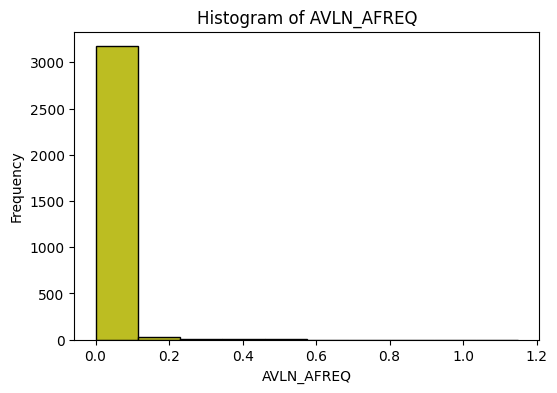

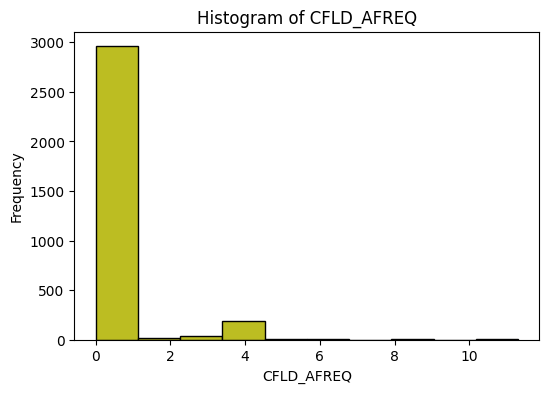

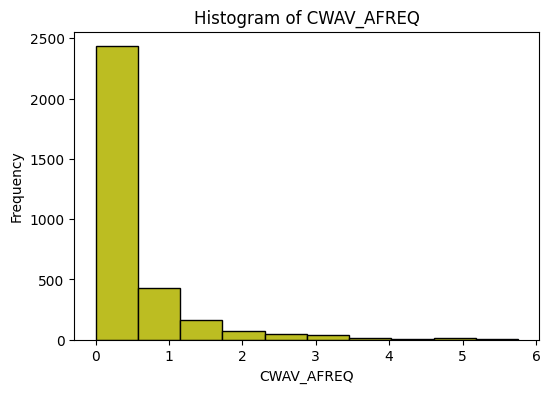

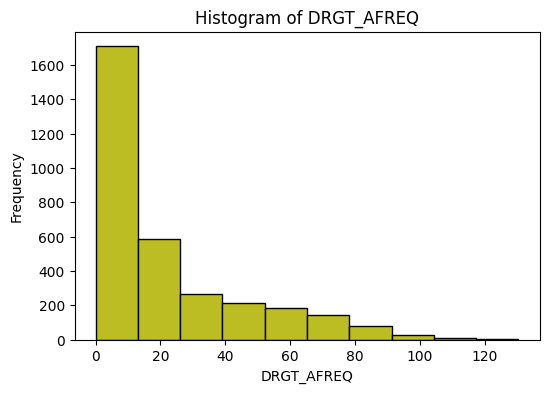

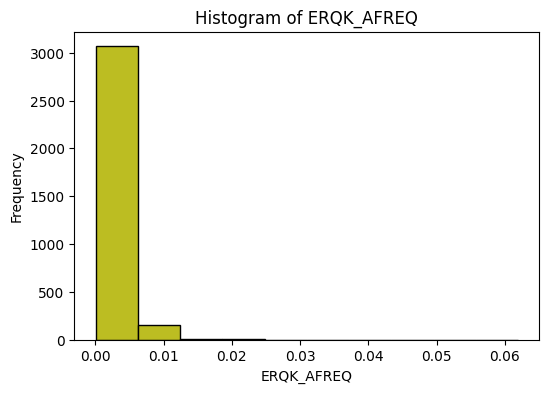

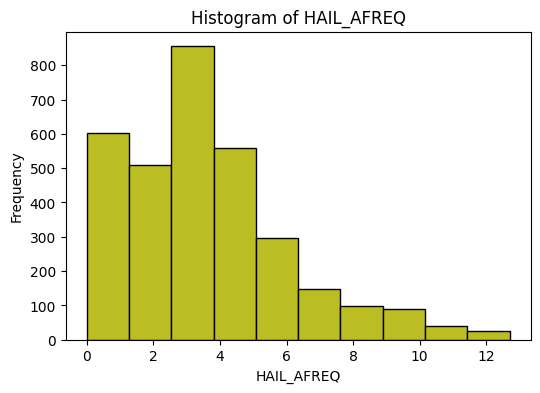

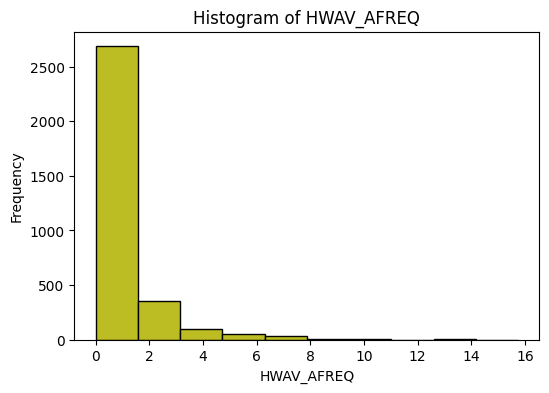

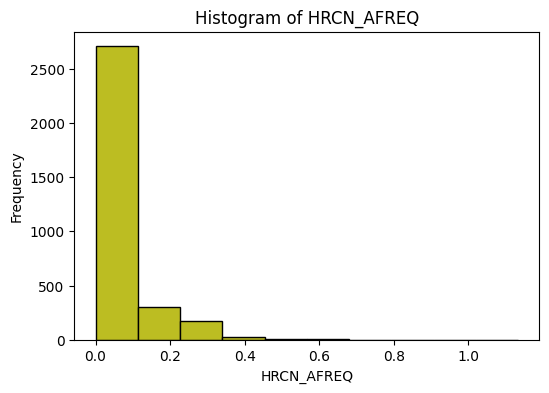

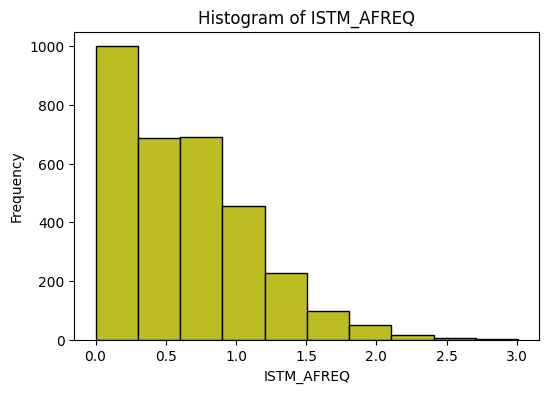

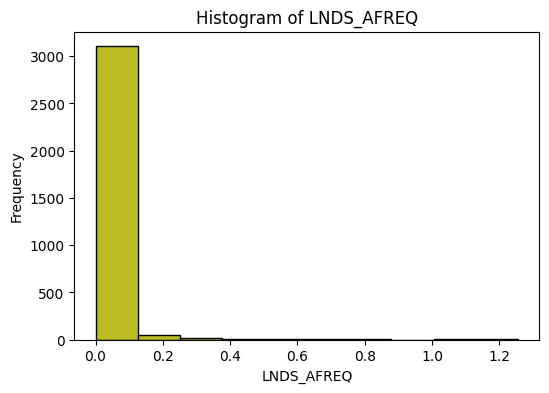

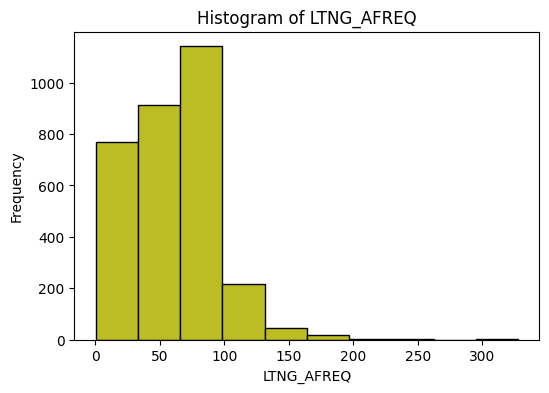

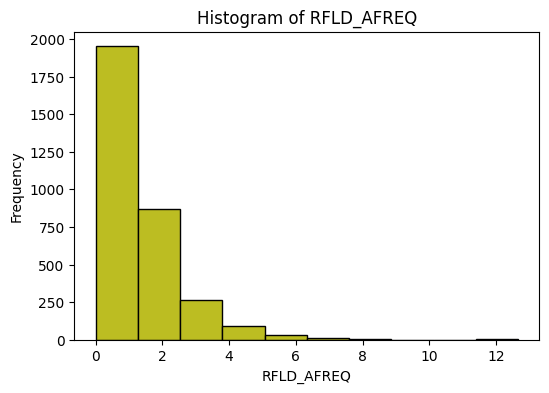

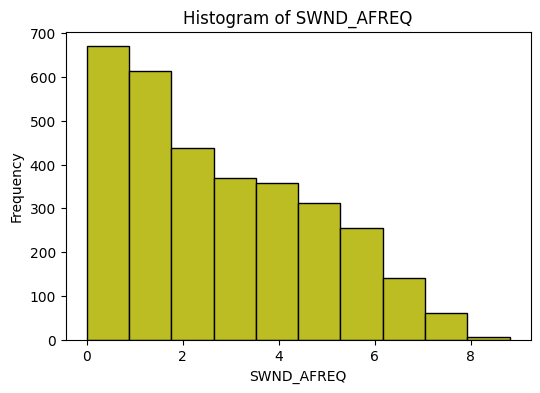

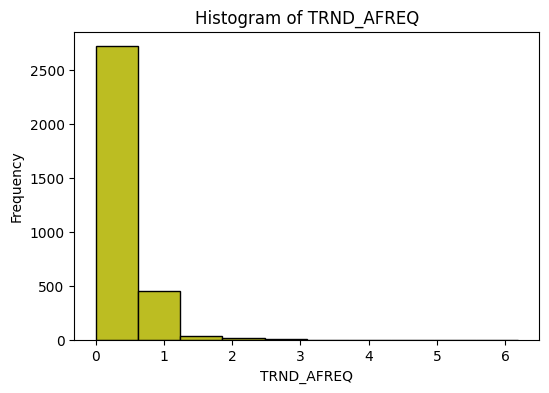

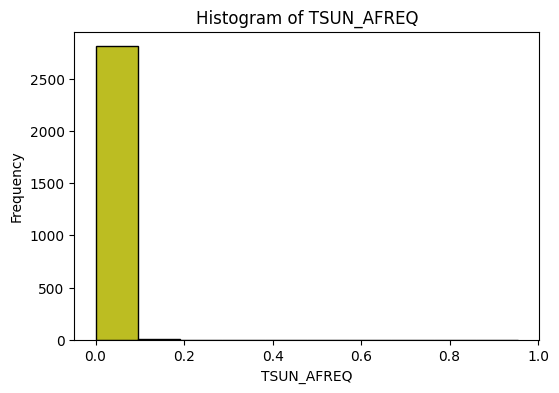

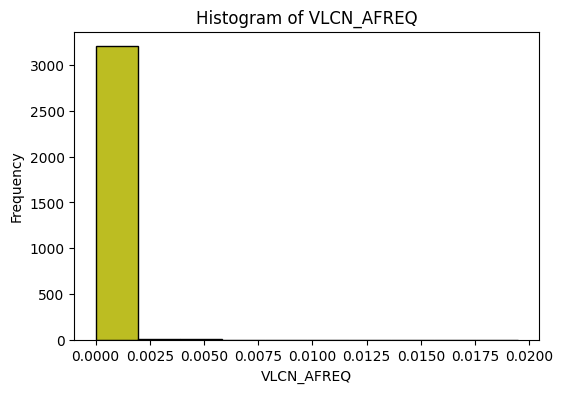

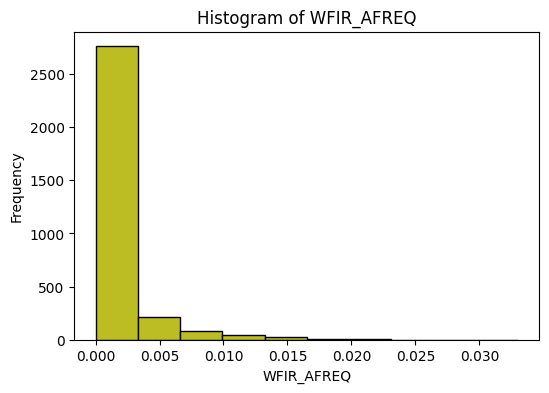

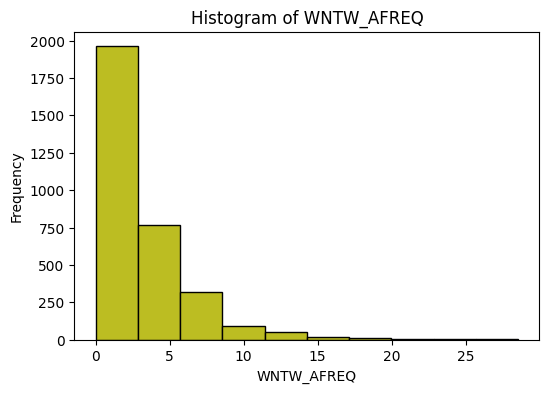

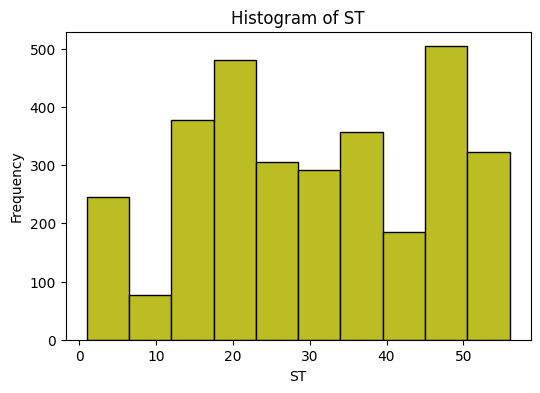

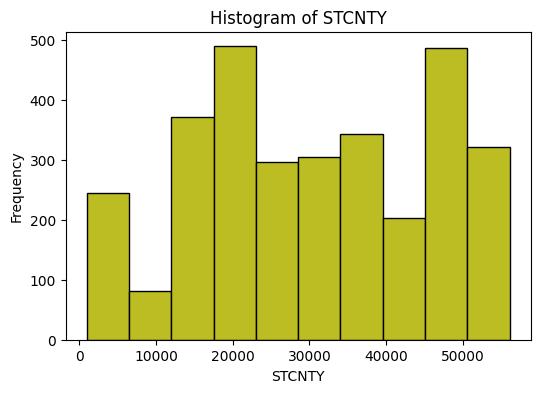

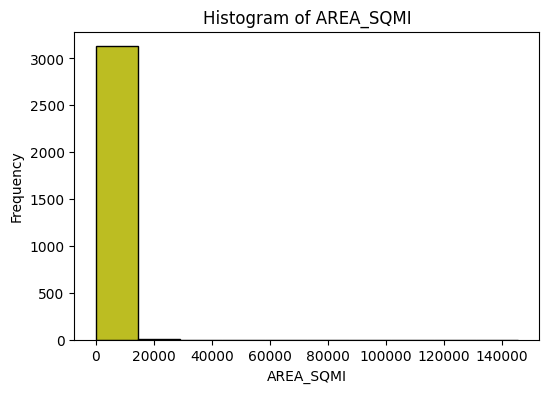

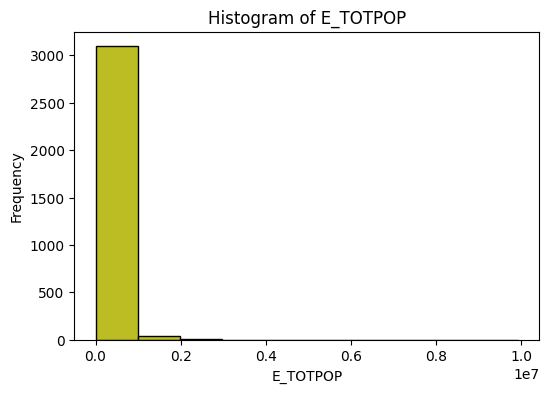

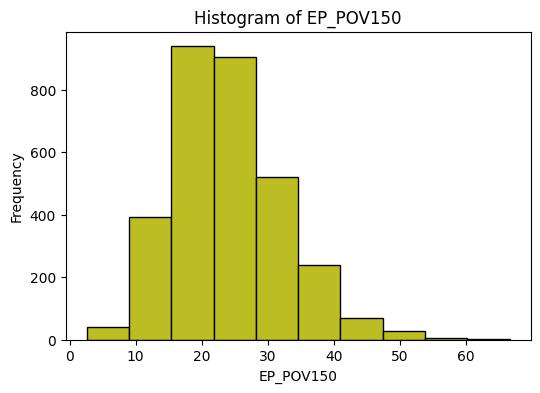

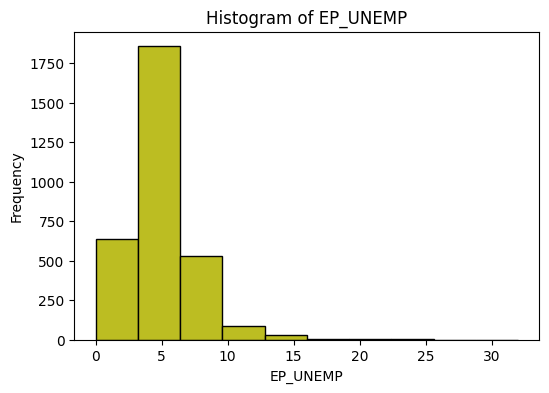

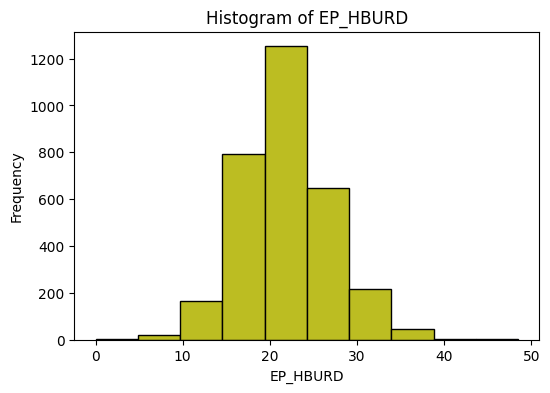

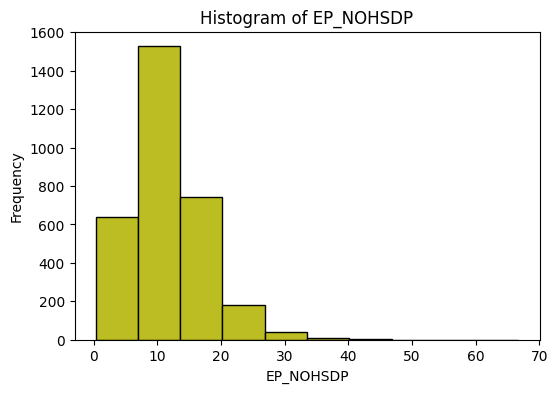

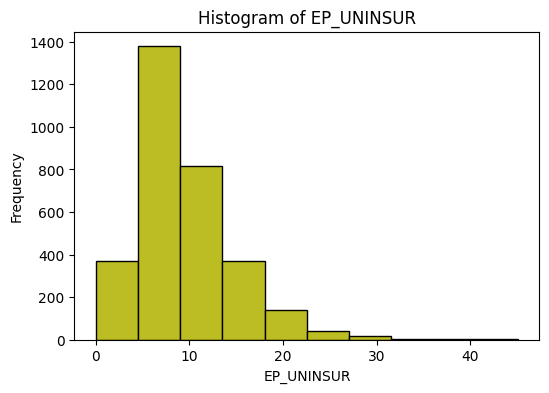

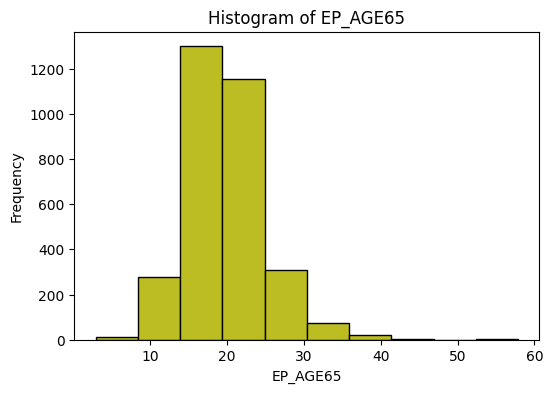

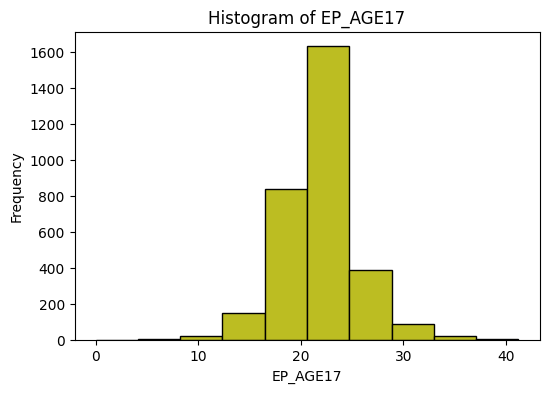

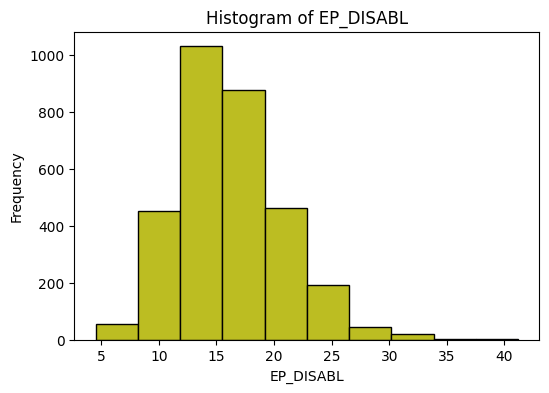

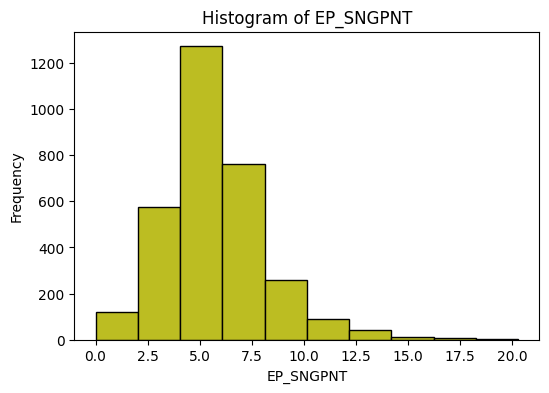

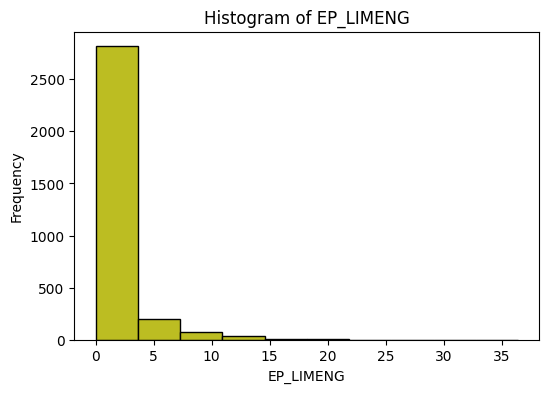

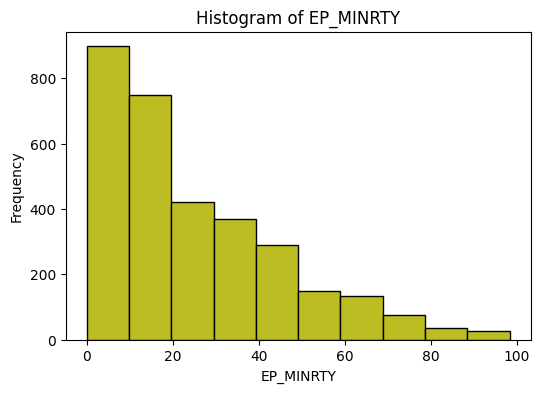

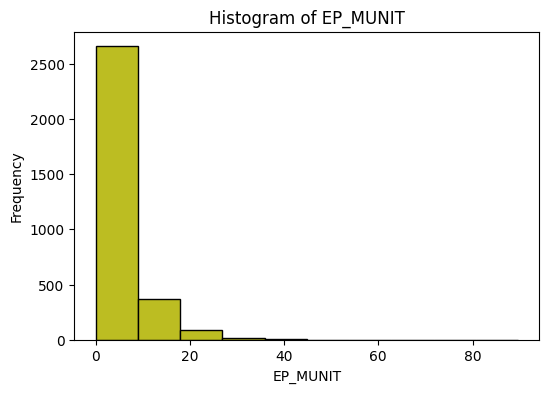

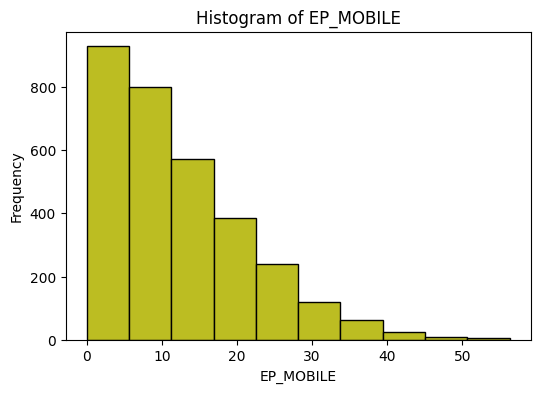

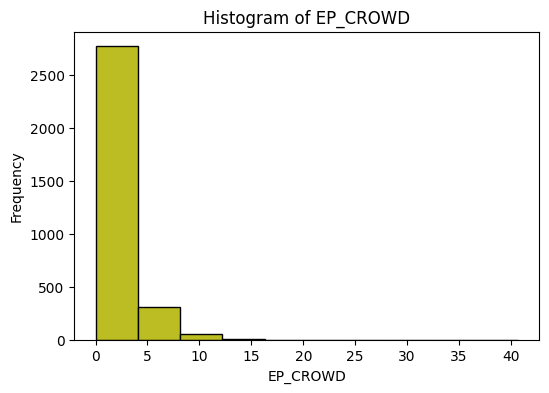

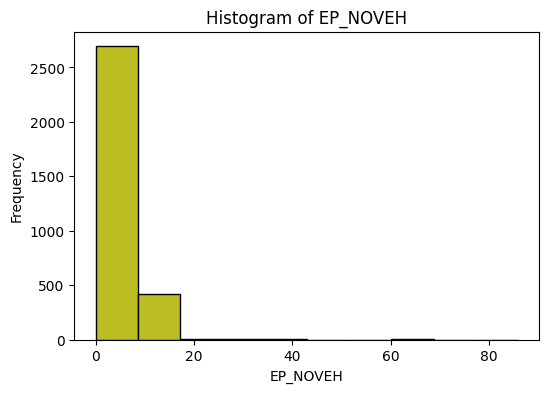

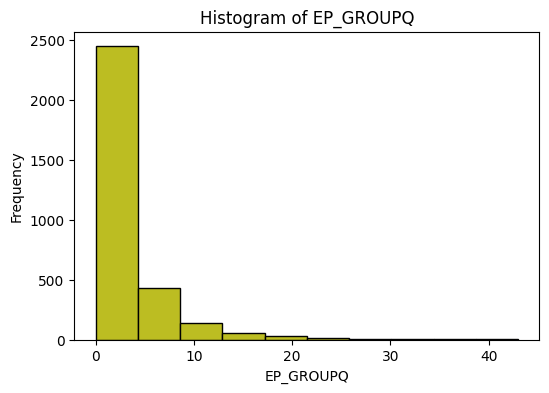

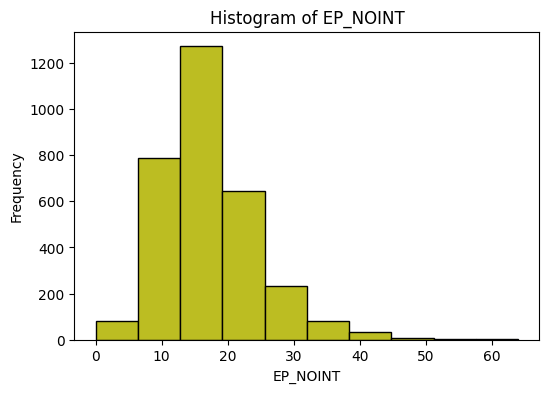

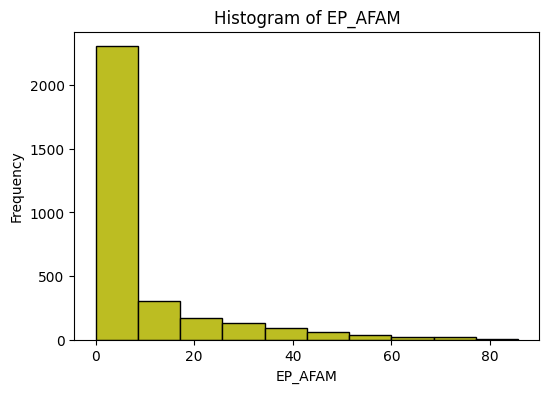

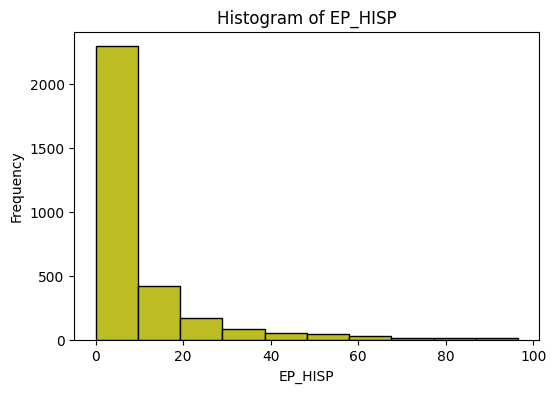

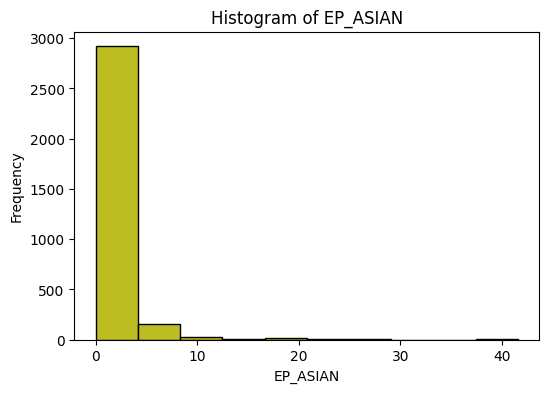

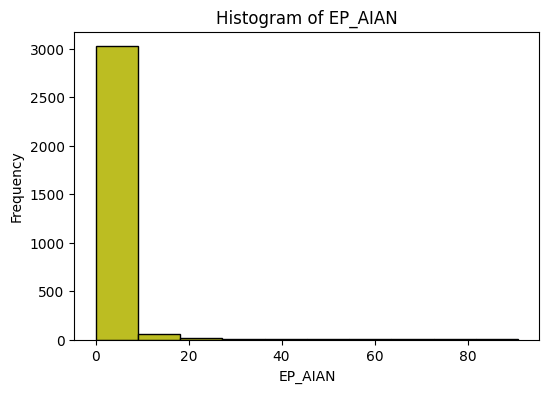

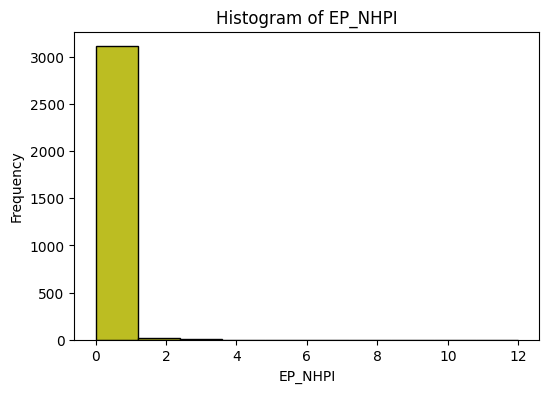

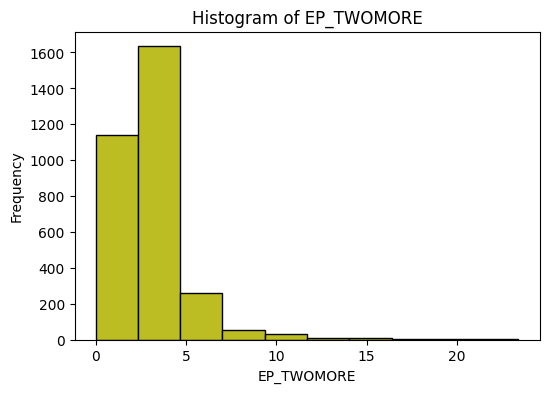

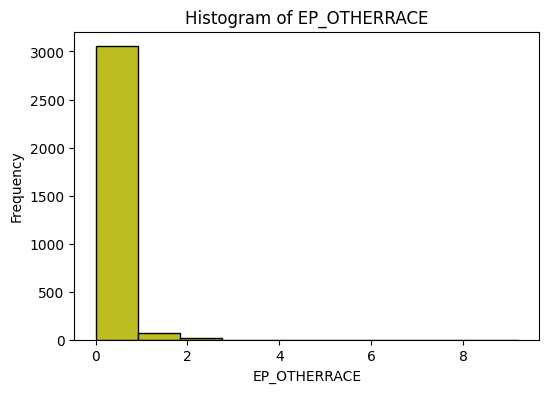

In [13]:
# We can filter the dataset selecting the columns which holds numerical values

merged_dataset_numerical = merged_dataset.select_dtypes(include = ['number'])   
    
print(merged_dataset_numerical)

# We can use Matplotlib to plot the histograms  

import matplotlib.pyplot as plt 

#With a for we can plot one histogram for every numerical variable in the dataframe 

for col in merged_dataset_numerical:
    plt.figure(figsize = (6,4)) 
    plt.hist(merged_dataset_numerical[col], color = 'tab:olive', edgecolor = 'black')   
    plt.title(f'Histogram of {col}') 
    plt.xlabel(col) 
    plt.ylabel('Frequency') 
    plt.show

In [14]:
#Exporting the new merged dataset    
merged_dataset.to_csv('../data/processed/merged_dataset.csv', index = False)